In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Example Data

Lets first look at some numbers drawn randomly from a normal distribution (the classic bell curve distribution)

In [ ]:
np.random.seed(69875)
mu, sigma = 15, 3 # mean and standard deviation
normal_dist = np.random.normal(loc=mu, scale=sigma, size=200)

# Histogram

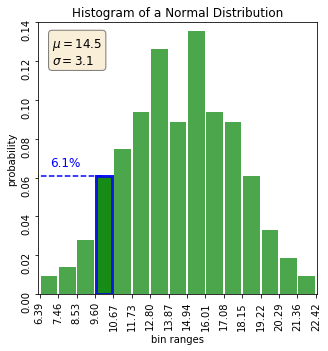

In [ ]:
mean = normal_dist.mean()
standard_deviation = normal_dist.std()
textstr = '\n'.join((rf'$\mu={mean:.1f}$',
                     rf'$\sigma={standard_deviation:.1f}$'))
fig, ax = plt.subplots(figsize=(5, 5))
n, bins, patches = ax.hist(x=normal_dist, bins=15, color='green',
                           density=True, alpha=0.7, rwidth=0.9)

# plot mean
# ax.plot([mean, mean], [0, 0.14], color='orange', ls='--')

# highlight example bin
ax.plot([6, 10], [n[3], n[3]], color='blue', ls='--')
ax.text(7, n[3]+0.005, '{0:.1%}'.format(n[3]),fontsize=12, color='blue')

highlited_bin = ax.add_patch(patches[3])
highlited_bin.set_edgecolor('blue')
highlited_bin.set_linewidth(3)

# plot distribution stats
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=props)

# Format Plot
ax.set_xticks(bins)
ax.tick_params(labelrotation=90)
ax.set_ylabel('probability')
ax.set_xlabel('bin ranges')
ax.set_title('Histogram of a Normal Distribution')
ax.set_xlim(6.3, 22.5)
ax.set_ylim(0, 0.14)
fig.savefig('normal_histogram.png', dpi=150, bbox_inches='tight')

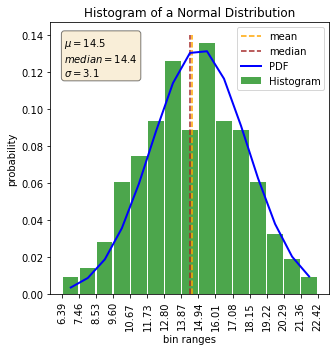

In [ ]:
mean = normal_dist.mean()
median = np.median(normal_dist)
standard_deviation = normal_dist.std()
textstr = '\n'.join((rf'$\mu={mean:.1f}$',
                     rf'$median={median:.1f}$',
                     rf'$\sigma={standard_deviation:.1f}$')
                   )

fig, ax = plt.subplots(figsize=(5, 5))
# Plot Histogram
n, bins, patches = ax.hist(x=normal_dist, bins=15, color='green',
                           density=True, alpha=0.7, rwidth=0.9, label='Histogram')

# plot distribution Stats
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=props)
# plot mean, median
ax.plot([mean, mean], [0, 0.14], color='orange', ls='--', label='mean')
ax.plot([median, median], [0, 0.14], color='brown', ls='--', label='median')

# plot the PDF
bin_centers = 0.5*(bins[1:] + bins[:-1])
pdf = stats.norm.pdf(bin_centers, mu, sigma)
ax.plot(bin_centers, pdf,
        linewidth=2, color='blue', label='PDF')

# Format Plot
ax.set_xticks(bins)
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylabel('probability')
ax.set_xlabel('bin ranges')
ax.set_title('Histogram of a Normal Distribution')
ax.legend()
fig.savefig('normal_histogram_pdf.png', dpi=150, bbox_inches='tight')

# CDF

In [ ]:
def ecdf(data):
    '''
    Take an array of your distribution values and return
    an emperical cdf
    
    Paramaters:
        data:np.array or list
        
    Returns:
        sorted_array, yidx_array
    '''
    if isinstance(data, list): data = np.array(data)
    
    # sort unique data
    x_values = np.sort(np.unique(data))
    # calculate cumulative probability
    d_size = len(x_values)
    y_values = np.arange(1, d_size + 1) / d_size 

    return x_values, y_values

In [ ]:
norm_x, norm_y = ecdf(normal_dist)

In [ ]:
norm_x[0:20]

array([ 6.38947255,  7.2625408 ,  7.87277848,  7.92189206,  8.45006994,
        8.59263582,  8.9766248 ,  9.14515896,  9.24375503,  9.33725088,
        9.51782332,  9.94464267,  9.94894524, 10.00385136, 10.22032393,
       10.22441329, 10.25674709, 10.30199866, 10.30290181, 10.36178252])

In [ ]:
c_list = ['#f768a1','#c51b8a','#7a0177']
c_p20 = c_list[0]
c_p50 = c_list[1]
c_p80 = c_list[2]

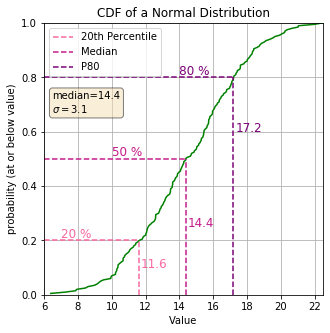

In [ ]:
mean = normal_dist.mean()
median = np.median(normal_dist)
standard_deviation = normal_dist.std()
textstr = '\n'.join((f'median={median:.1f}',
                     rf'$\sigma={standard_deviation:.1f}$')
                   )

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(norm_x, norm_y, color='green')

# plot mean, percentiles
idx_p20 = np.where(norm_y == 0.2)[0][0]
p20 = norm_x[idx_p20]
idx_p50 = np.where(norm_y == 0.5)[0][0]
p50 = norm_x[idx_p50]
idx_p80 = np.where(norm_y == 0.8)[0][0]
p80 = norm_x[idx_p80]

ax.plot([p20, p20], [0, 0.2], color=c_p20, ls='--', label='20th Percentile')
ax.plot([6, p20], [0.2 , 0.2], color=c_p20, ls='--')
ax.text(7, 0.21, '20 %',fontsize=12, color=c_p20)
ax.text(p20 + 0.1, 0.1, f'{p20:.1f}',fontsize=12, color=c_p20)

ax.plot([p50, p50], [0, 0.5], color=c_p50, ls='--', label='Median')
ax.plot([6, p50], [0.5 , 0.5], color=c_p50, ls='--')
ax.text(10, 0.51, '50 %',fontsize=12, color=c_p50)
ax.text(p50 + 0.1, 0.25, f'{p50:.1f}',fontsize=12, color=c_p50)

ax.plot([p80, p80], [0, 0.8], color=c_p80, ls='--', label='P80')
ax.plot([6, p80], [0.8 , 0.8], color=c_p80, ls='--')
ax.text(14, 0.81, '80 %',fontsize=12, color=c_p80)
ax.text(p80 + 0.1, 0.6, f'{p80:.1f}',fontsize=12, color=c_p80)
#ax.plot()

# plot distribution Stats
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.03, 0.75, textstr, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=props)
# Format Plot
ax.set_xlim(6, 22.5)
ax.set_ylim(0, 1)
#ax.tick_params(axis='x', labelrotation=90)
ax.set_ylabel('probability (at or below value)')
ax.set_xlabel('Value')
ax.set_title('CDF of a Normal Distribution')
ax.grid()
ax.legend(loc=0)
fig.savefig('normal_cdf.png', dpi=150, bbox_inches='tight')